## Task 1

### DCGAN
My GAN is based on DCGAN.
![](./md_imgs/dcgan.png)

### Generator
The transpose convolution block is same as DCGAN, I stack three such blocks to generator a 32\*32 feature map.
```python
nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
nn.BatchNorm2d(out_channels)
nn.ReLU(inplace=True)
```
To generator a 28\*28 image, I modify the genertor by appending a dilation convolution layer to decrease the size and a normal convolution layer to refine result.
```python
nn.Conv2d(base_channel, base_channel, kernel_size=3, stride=1, padding=0, dilation=2, bias=False),
nn.BatchNorm2d(base_channel),
nn.ReLU(inplace=True),
nn.Conv2d(base_channel, out_channels, kernel_size=3, padding=1, dilation=1),
nn.Tanh()
```

### Discriminator
The operation is almost the reverse opoeration of generator to keep the computation capacity balance.
```python
nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
nn.BatchNorm2d(out_channels),
nn.LeakyReLU(negative_slope=0.2, inplace=True)
```
Stack the above block. Use 1\*1 convolution and sigmoid to classify.

### Training

#### Generate ground truth
```python
true_pred = discriminator(imgs)
true_loss = cross_entropy(true_pred, true_y)
```

#### Training discriminator
```python
discriminator.zero_grad()

noise = torch.randn((batch_size, dimensionality)).view(batch_size, dimensionality, 1, 1).cuda()
gen_img = generator(noise)
fake_pred = discriminator(gen_img.detach())
fake_loss = cross_entropy(fake_pred, fake_y) # here is binary cross entropy

loss = true_loss + fake_loss

loss.backward()
optimizer_D.step()
```

#### Training generator
```python
generator.zero_grad()

fake_pred = discriminator(gen_img)
gen_loss = cross_entropy(fake_pred, true_y)
epoch_gen_loss += gen_loss

gen_loss.backward()
optimizer_G.step()
```

### Training record
Because this training is time-consuming, I didn't train on notebook. Instead, I took a screenshot and store the records and model.
![](./md_imgs/train.png)

## Task 2

#### Step 0
Noise at the beginning
![Step 0](./images/0.png)

#### Step 500
a little shape
![Step 500](./images/500.png)

#### Step 2000
It's kind of like a number
![Step 2000](./images/2000.png)

#### Step 6000
Not Bad
![Step 6000](./images/6000.png)

#### Step 47500
After convergence
![Step 47500](./images/47500.png)

#### Step 93500
Final step
![Step 93500](./images/93500.png)

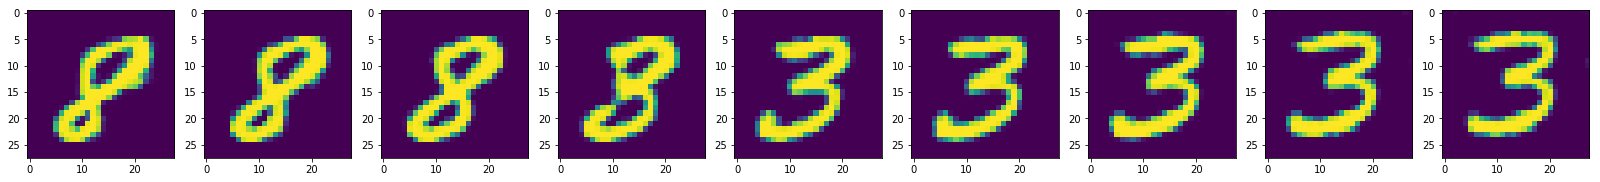

In [7]:
# Task 3

import torch
import matplotlib.pyplot as plt
from my_gan import Generator

# load model
generator = torch.load('./models/G_47500.pt').eval()

noises = []
# init noise
init_noise = torch.randn(100).view(1, 100, 1, 1).cuda()

# end noise
end_noise = torch.randn(100).view(1, 100, 1, 1).cuda()

for i in range(9):
    noise = (9-i)*(1/9) * end_noise - i*(1/9) * init_noise
    noises.append(noise)
    
fig, axs = plt.subplots(1, 9, figsize=(28, 252))
for i in range(len(noises)):
    img = generator(noises[i]).squeeze().cpu()
    axs[i].imshow(img.detach().numpy())
plt.show()